# Learning Curve 
To see how model perform training and validation

In [53]:
from data_set import get_x_y
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure



X, y = get_x_y()


In [98]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    training_error, validation_error = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        training_error.append(mean_squared_error(y_train_predict, y_train[:m]))
        validation_error.append(mean_squared_error(y_val_predict, y_val ))
    figure(figsize=(8, 6), dpi=80)
    plt.plot(np.sqrt(training_error), "r-+", linewidth=2)
    plt.legend("train", prop={'size': 6})
    plt.plot(np.sqrt(validation_error), "g", linewidth=3)
    plt.legend("val",  prop={'size': 6})
    figure(figsize=(8, 6), dpi=80)
    
 
    

### Under-fitting model 

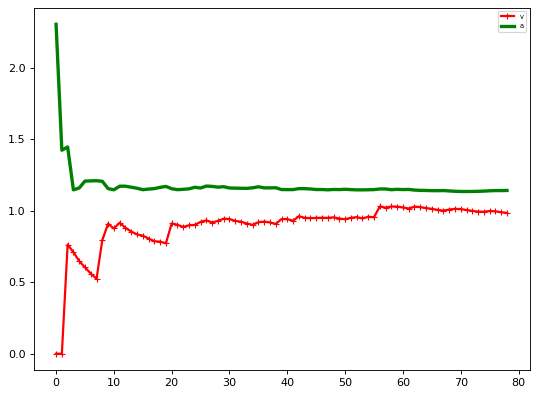

<Figure size 640x480 with 0 Axes>

In [99]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)  

This deserves a bit of explanation:
##### Training curve: 
1. When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. 
2. New instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all
3. The error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. 
##### Validation curve


1. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big.
2. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down
3. once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve

These learning curves are typical of an underfitting model. Both curves have reached
a plateau; they are close and fairly high.


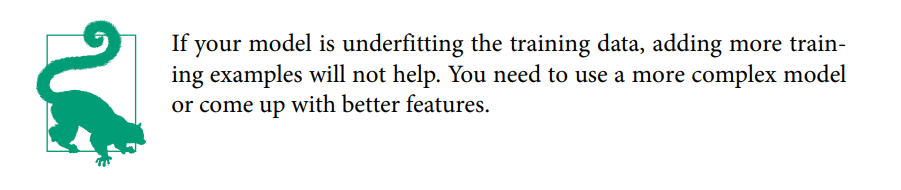

#### Over-fitting Model if luck or not
Try to find the degree that overfitting, in my case it very good :)

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [108]:
polynomial_regression = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=5, include_bias = True)),
    ("lin_reg", LinearRegression())
])

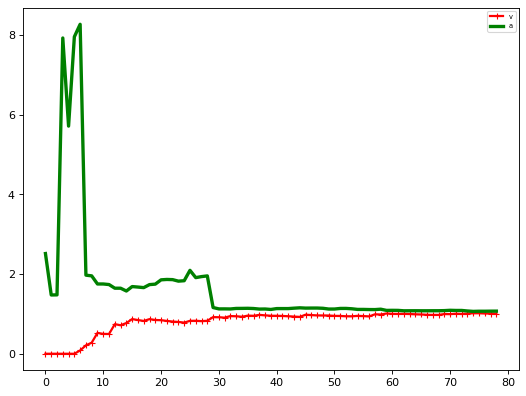

<Figure size 640x480 with 0 Axes>

In [109]:
plot_learning_curves(polynomial_regression, X, y)

If Model is over-fitting:
1. The error on the training data is much lower than with the Linear Regression model.
2. There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.


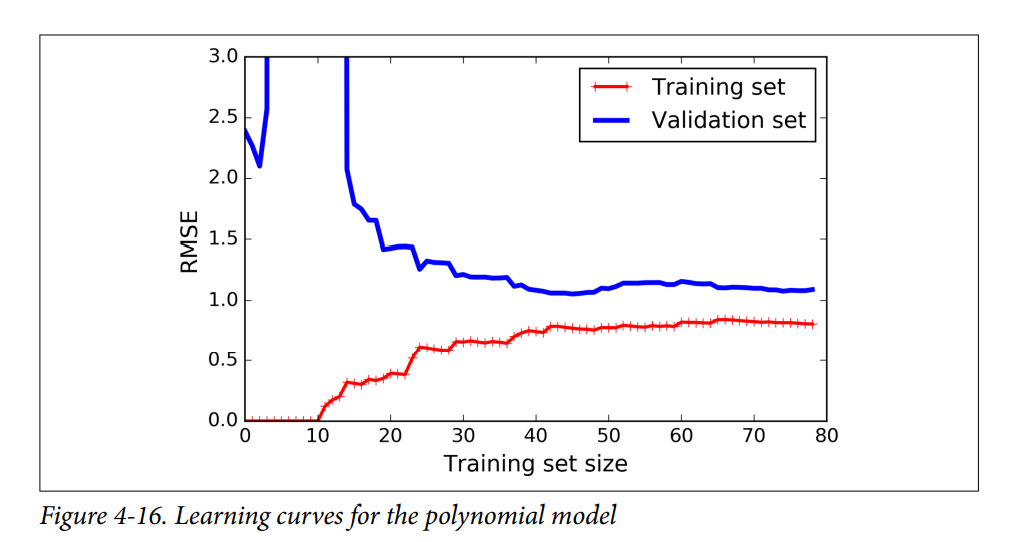

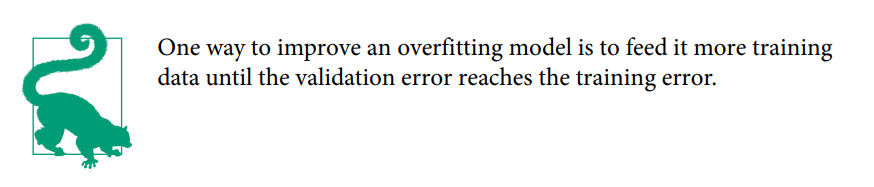

## The Bias / Variance Trade Off

An important theoretical result of statistics and Machine Learning is the fact that a
model’s generalization error can be expressed as the sum of three very different
errors:

##### Bias:
This part of the generalization error is due to wrong assumptions, such as assum‐
ing that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data.

##### Variance:
This part is due to the model’s excessive sensitivity to small variations in the
training data. A model with many degrees of freedom (such as a high-degree pol‐
ynomial model) is likely to have high variance, and thus to overfit the training
data.

##### Irreducible error:
This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).

##### note:
Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance. 
This is why it is called a tradeoff.